In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from math import fabs
from random import randint

2025-03-11 00:20:22.198604: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-11 00:20:23.136438: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-11 00:20:30.086753: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-11 00:20:30.086810: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-11 00:20:31.650004: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
# Definindo algumas variáveis
saidas = ['DOMPRECDOMEXP', 'DOMPRECRESEXP', 'ADENSEXCDOMEXP', 'ADENSEXCRESEXP',	'ONUSEXCDOMEXP', 'ONUSEXCRESEXP', 'COABFAMDOMEXP', 'COABFAMRESEXP']
saidasDomicilios = ['DOMPRECDOMEXP', 'ADENSEXCDOMEXP', 'ONUSEXCDOMEXP', 'COABFAMDOMEXP']
saidasDesidentes = ['DOMPRECRESEXP', 'ADENSEXCRESEXP', 'ONUSEXCRESEXP', 'COABFAMRESEXP']
domiciliosPrecarios = ['DOMPRECDOMEXP']
adensamentoExcessivo = ['ADENSEXCDOMEXP']
onusExcessivo = ['ONUSEXCDOMEXP']
coabtaçãoFamiliar = ['COABFAMDOMEXP']

In [3]:
# Importa os dados
deficit_data_y = pd.read_excel('Banco_903_Amostras_Completo.xlsx')[saidasDomicilios]
deficit_data_x = pd.read_excel('Dimensoes_PCA_903_Amostras.xlsx')

# Concatena os dois blocos horizontalmente
deficit_data = pd.concat([deficit_data_x, deficit_data_y], axis=1)

# Exibe o banco de dados
deficit_data

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,DOMPRECDOMEXP,ADENSEXCDOMEXP,ONUSEXCDOMEXP,COABFAMDOMEXP
0,-4.255267,1.636565,-0.734032,0.249567,-0.490873,9.55,0.00,308.77,90
1,-0.902284,-0.905511,-0.164092,-0.336964,-0.130283,11.43,126.68,333.07,686
2,-3.514829,-0.457965,0.832445,-0.888344,0.783307,78.55,39.05,111.92,235
3,0.383952,0.202920,-0.351442,0.387851,0.348902,20.22,138.96,496.56,484
4,-1.425747,0.337700,-0.249719,0.413795,0.236795,8.57,120.49,373.83,337
...,...,...,...,...,...,...,...,...,...
898,-2.160979,-0.774764,2.681624,-1.242698,-0.451944,22.77,88.48,52.31,480
899,3.486756,1.296490,0.961841,-1.467687,1.530743,19.36,64.34,313.49,881
900,-3.217481,0.661316,-0.593865,0.031387,0.020535,0.00,76.27,157.44,389
901,-1.105044,0.994186,-0.674440,-0.233511,-0.088889,47.05,21.22,390.45,670


In [4]:
# Embaralha a ordem das amostras e divide em blocos de treino (80%) e validação (20%)
train, validation = train_test_split(deficit_data, test_size=0.2, random_state=randint(0, 100))

# Separando as variáveis explicativas das variáveis resposta
train_x = train.drop(columns=saidasDomicilios)
validation_x = validation.drop(columns=saidasDomicilios)
train_y = train[saidasDomicilios]
validation_y = validation[saidasDomicilios]

# Separa uma parte do bloco de teste
numLines = int(validation_x.shape[0] * 0.25) #Equivalente a aproximadamente 5% do banco de dados
validation_x, test_x = validation_x[:numLines], validation_x[numLines:]
validation_y, test_y = validation_y[:numLines], validation_y[numLines:]

In [5]:
# Inicializa a rede neural
neuralNetwork = Sequential()
neuralNetwork.add(Dense(units = 24, activation = 'relu', input_dim = validation_x.shape[1]))
neuralNetwork.add(Dense(units = train_y.shape[1], activation = 'linear'))
neuralNetwork.compile(loss = 'huber', optimizer = 'rmsprop', metrics = ['mae'])

2025-03-11 00:20:44.567517: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-11 00:20:44.567991: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
# Inicia o treinamento da rede
redes_treinadas = neuralNetwork.fit(train_x, train_y, epochs = 400, batch_size = 32, validation_data = (validation_x, validation_y))

Epoch 1/400
23/23 [==============================] - 1s 6ms/step - loss: 309.2913 - mae: 309.7877 - val_loss: 358.8185 - val_mae: 359.3175
Epoch 2/400
23/23 [==============================] - 0s 1ms/step - loss: 308.9684 - mae: 309.4666 - val_loss: 358.4959 - val_mae: 358.9932
Epoch 3/400
23/23 [==============================] - 0s 2ms/step - loss: 308.6649 - mae: 309.1642 - val_loss: 358.1606 - val_mae: 358.6597
Epoch 4/400
23/23 [==============================] - 0s 2ms/step - loss: 308.3461 - mae: 308.8457 - val_loss: 357.8079 - val_mae: 358.3078
Epoch 5/400
23/23 [==============================] - 0s 1ms/step - loss: 308.0092 - mae: 308.5090 - val_loss: 357.4339 - val_mae: 357.9339
Epoch 6/400
23/23 [==============================] - 0s 1ms/step - loss: 307.6428 - mae: 308.1426 - val_loss: 357.0241 - val_mae: 357.5241
Epoch 7/400
23/23 [==============================] - 0s 1ms/step - loss: 307.2493 - mae: 307.7493 - val_loss: 356.5923 - val_mae: 357.0923
Epoch 8/400
23/23 [========

99.78101348876953


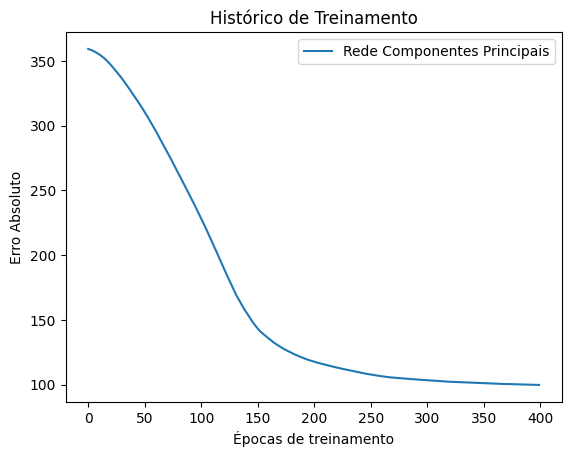

In [7]:
# Imprime o menor erro absoluto médio encontrado
print(min(neuralNetwork.history.history['val_mae']))

# Plota o gráfico de convegência do treinamento
plt.plot(neuralNetwork.history.history['val_mae'])
plt.title('Histórico de Treinamento')
plt.ylabel('Erro Absoluto')
plt.xlabel('Épocas de treinamento')
plt.legend(['Rede Componentes Principais'])
plt.show()

In [8]:
# Insere os valores de teste na rede e coleta os resultados gerados pela rede
predicts = neuralNetwork.predict(test_x)

5/5 [==============================] - 0s 945us/step


In [9]:
errorPercentage = []

# Calculo do tamanho do erro
for i in range(test_y.shape[0]):
    errorPercentage.append([])

    for j in range(test_y.shape[1]):
        erro = fabs(predicts[i][j] - test_y.iloc[i,j]) # Calcula o módulo da diferença entre o valor real e o gerado pela rede

        if test_y.iloc[i,j] != 0: # Verifica se o valor real é diferente de zero para evitar divisão por zero
            errorPercentage[i].append((erro / test_y.iloc[i,j])*100) # Calcula a porcentagem do tamanho do erro em relaçao ao valor real

        else:
            errorPercentage[i].append(None)  # Substitui a porcentagem com um valor nulo para ser descartado

# Exibe o resultado
for i in errorPercentage:
    print(i)

[208.98341794456505, 104.72518029491518, 39.88775724418058, 5.099735368176985]
[98.93194196302053, 5.111275467218138, 26.556840241627615, 6.589732284686923]
[16.40008206287387, 52.977108708641296, 146.1830806459039, 7.636284233790685]
[69.13011187658424, 51.73514550709392, 26.310427629140694, 16.007733193172772]
[4.852498979257931, 13.121174470321561, 10.403710973970648, 20.429390405796816]
[None, 35.030665692387934, 1.3592003988794599, 56.44828177787162]
[7.3261878582553, 22.15327998592678, 17.740650477059532, 33.60968100861964]
[76.58433134480306, 22.91581264246146, 5.146520067247417, 5.367347094772889]
[7.719280674005116, 19.141512324116807, 16.01994200043903, 16.153958834134617]
[67.03497764592625, 121.31730284943497, 50.420593054967455, 26.600998484027322]
[None, 16.697304404490314, 18.659027357009236, 27.732764350043404]
[298.89748464494744, 1958.0995430066746, 25.91763336751272, 73.52801428900825]
[None, 188.06939214405958, 98.6390085048124, 4.284628591229839]
[69.15223792510953

In [ ]:
meanErrorPercentage = []

# Calcula a média das porcentagens excluindo os valores nulos
for i in range(test_y.shape[1]):
    sum = 0
    counter = test_y.shape[0]

    for j in range(test_y.shape[0]):
        if errorPercentage[j][i] == None:
            counter -= 1

        else:
            sum += errorPercentage[j][i]

    meanErrorPercentage.append(sum/counter)

print("Média do Erro em Porcetagem")
for i in range(len(meanErrorPercentage)):
    print("{}: {:.2f}%".format(saidasDomicilios[i], meanErrorPercentage[i]))

Média do Erro em Porcetagem
DOMPRECDOMEXP: 75.64%
ADENSEXCDOMEXP: 87.12%
ONUSEXCDOMEXP: 46.88%
COABFAMDOMEXP: 33.17%
